## Image Classification

4422102/4422102 [==============================] - 0s 0us/step


/Users/test/miniforge3/envs/machine-learning-env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
2024-04-16 12:32:35.201968: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


> 89.925
> 91.492
> 91.125
> 91.117
> 90.300


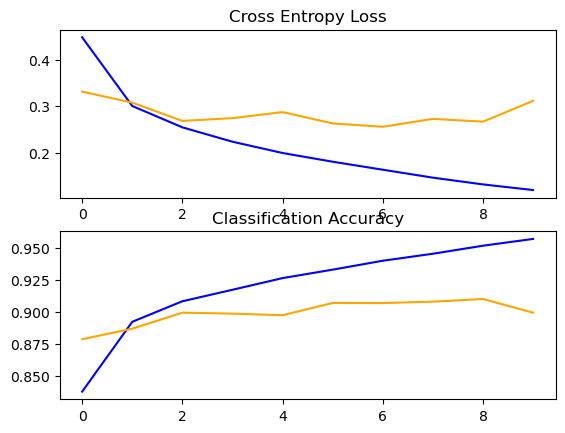

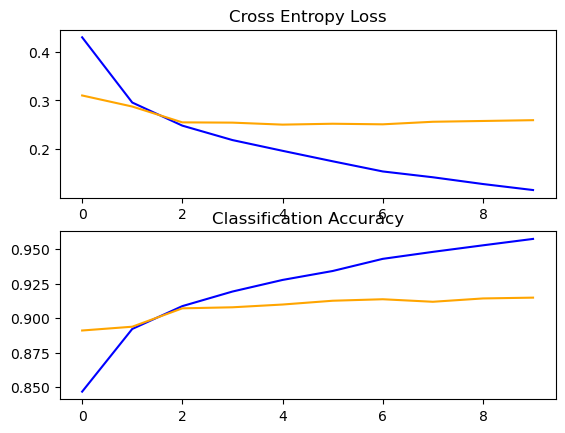

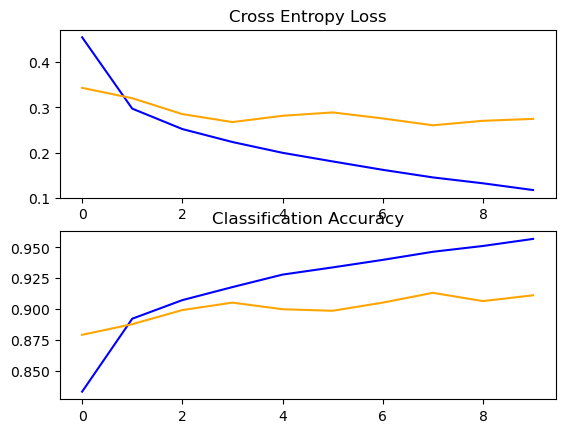

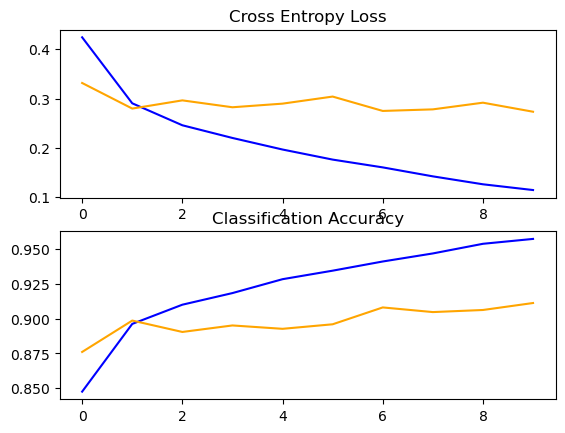

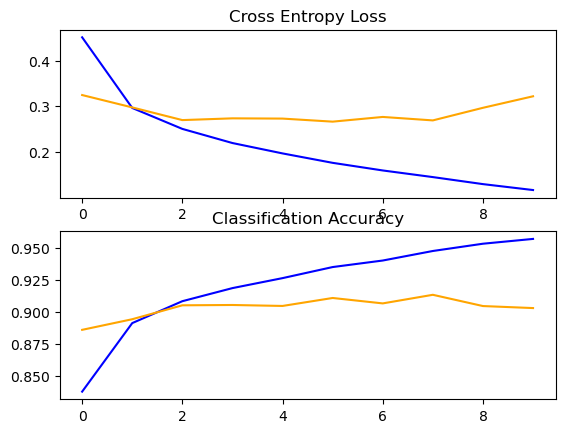

Accuracy: mean=90.792 std=0.583, n=5


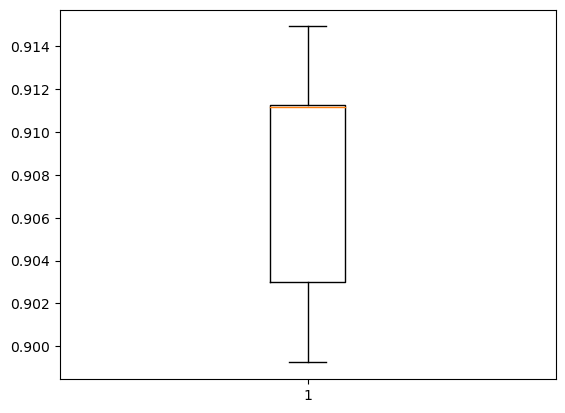

In [1]:

# baseline cnn model for fashion mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = fashion_mnist.load_data()
  # reshape dataset to have a single channel
  trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
  testX = testX.reshape((testX.shape[0], 28, 28, 1))
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY
# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats 
  train_norm = train.astype('float32') 
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0 
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
        input_shape=(28, 28, 1)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Flatten())
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
  return model


# evaluate a model using k-fold cross-validation
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  # prepare cross validation
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  # enumerate splits
  for train_ix, test_ix in kfold.split(dataX):
    # define model
    model = define_model()
    # select rows for train and test
    trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix],dataY[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX,
       testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0) 
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)
  return scores, histories


# plot diagnostic learning curves
def summarize_diagnostics(histories):
  for i in range(len(histories)):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss') 
    pyplot.plot(histories[i].history['loss'], color='blue', label='train') 
    pyplot.plot(histories[i].history['val_loss'], color='orange', label='test') # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy') 
    pyplot.plot(histories[i].history['accuracy'], color='blue', label='train') 
    pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()
    
# summarize model performance
def summarize_performance(scores):
  # print summary
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100,
        len(scores)))
  # box and whisker plots of results
  pyplot.boxplot(scores)
  pyplot.show()
  
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # evaluate model
  scores, histories = evaluate_model(trainX, trainY)
  # learning curves
  summarize_diagnostics(histories)
  # summarize estimated performance
  summarize_performance(scores)
# entry point, run the test harness
run_test_harness()

## Dropout Regularization

In [1]:
from keras.layers import Dropout
# define cnn model
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform',
  padding='same', input_shape=(200, 200, 3)))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform',
  padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
  padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform')) 
  model.add(Dropout(0.5))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy']) 
  return model

In [2]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss') 
  pyplot.plot(history.history['loss'], color='blue', label='train') 
  pyplot.plot(history.history['val_loss'], color='orange', label='test') # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy') 
  pyplot.plot(history.history['accuracy'], color='blue', label='train') 
  pyplot.plot(history.history['val_acc'], color='orange', label='test') # save plot to file
  pyplot.close()